## EDA ON NEPAL HOUISING PROJECT 
### (web scpraped from nepali realstate sites)

dataset= https://github.com/Coolsajan/nepalhousingdataset

The following dataset is webscrapped from nepali realestate side that might cover some impurities and outliers which need to be drop or FE is need to clear some null values.


In [1]:
#importing necessary libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading dataset
df=pd.read_csv('nepal_hosuing_datetset.csv')
df.head()

,price,location,area,facing,no_of_bedroom,no_of_bathroom,no_of_livingroom,no_of_kitchen,parking,road_size,furniture,no_of_flat
0,32000000.0,"Shital height, Imadol",1069.53,east,5.0,4.0,2.0,3.0,4.0,13.0,semi-furnished,3.0
1,28000000.0,Shital Height,1026.75,west,5.0,4.0,2.0,3.5,2.0,13.0,semi-furnished,3.5
2,40000000.0,"Shital height, Imadol",1369.00,north,6.0,4.0,2.0,2.5,4.0,13.0,fully-furnished,2.5
3,28000000.0,Bhaisepati,1369.00,south,6.0,3.0,2.0,2.5,4.0,16.0,fully-furnished,2.5
4,40000000.0,Harisiddhi,2395.75,east,6.0,4.0,2.0,2.5,4.0,13.0,fully-furnished,2.5


From the above data set our target(y) column is price and rest are our dependent(X) features.

Checking the data types of all the columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2499 non-null   float64
 1   location          2691 non-null   object 
 2   area              2488 non-null   float64
 3   facing            1467 non-null   object 
 4   no_of_bedroom     2691 non-null   float64
 5   no_of_bathroom    2691 non-null   float64
 6   no_of_livingroom  2691 non-null   float64
 7   no_of_kitchen     2691 non-null   float64
 8   parking           1427 non-null   float64
 9   road_size         1441 non-null   float64
 10  furniture         1467 non-null   object 
 11  no_of_flat        2689 non-null   float64
dtypes: float64(9), object(3)
memory usage: 252.4+ KB


In [4]:
#collecting the catagorecal and numerical features.
numerical_features=[features for features in df.columns if df[features].dtype !='O']
categorical_features=[features for features in df.columns if df[features].dtype =='O']

print(f'The number of numerical features is {len(numerical_features)}:{numerical_features}')
print(f'The number of categorical features is {len(categorical_features)}:{categorical_features}')

The number of numerical features is 9:['price', 'area', 'no_of_bedroom', 'no_of_bathroom', 'no_of_livingroom', 'no_of_kitchen', 'parking', 'road_size', 'no_of_flat']
The number of categorical features is 3:['location', 'facing', 'furniture']


# Analysing the Categorical Features


In [5]:
#We have 3 categorual features that are:
print(categorical_features)

['location', 'facing', 'furniture']


Checking the missing values.

In [6]:
[print(f'The number of missing value in {feature} is :{df[feature].isnull().sum()}') for feature in categorical_features]
print('-------------------------------------------------')
print(f'The total number of rows in in our dataset is :{len(df['price'])}')

The number of missing value in location is :0
The number of missing value in facing is :1224
The number of missing value in furniture is :1224
-------------------------------------------------
The total number of rows in in our dataset is :2691


Collecting the proportion  of missing data from categorical features

In [7]:
[print(f'The proportion  of missing value in {feature} is :{df[feature].isnull().sum()/len(df['price'])*100}') for feature in categorical_features]


The proportion  of missing value in location is :0.0
The proportion  of missing value in facing is :45.48494983277592
The proportion  of missing value in furniture is :45.48494983277592


[None, None, None]

# Insight
Facing and Furnishing both have arounf 45% od null values.
Since in nepal furnishing and facing are less impacted by the price so we can fill the missing value with some imputer technique.

In [8]:
[print(df[feature].value_counts()) for feature in categorical_features]

location
Imadol,Lalitpur                                 255
Hattigauda,Kathmandu                            204
Tikathali,Lalitpur                              153
Hattiban,Lalitpur                               102
Bansbari,Kathmandu                              102
                                               ... 
Kathmandu ,Dhumbarai-4,Near pipal bot chowk.      1
Tikathali, lalitpur                               1
1 km from deuba chowk                             1
Shital Height, Imadol                             1
Sanepa Chowk                                      1
Name: count, Length: 634, dtype: int64
facing
east                459
south               313
west                184
north               133
east-south          125
east-north           80
south-west           71
east-west            38
north-west           32
north-south          10
east,south            4
south,west            4
north,west            4
east,west             2
east,north            2
east-north-so

[None, None, None]

From the above 

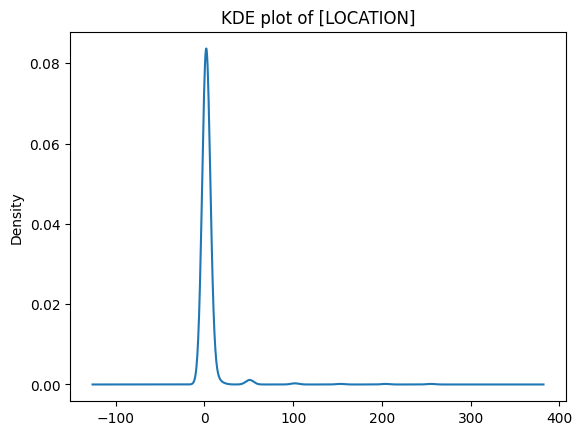

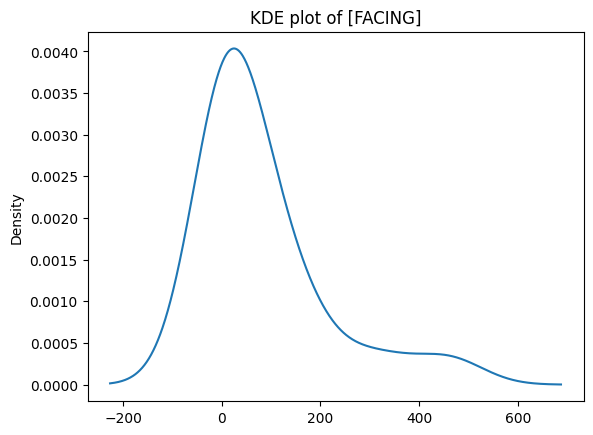

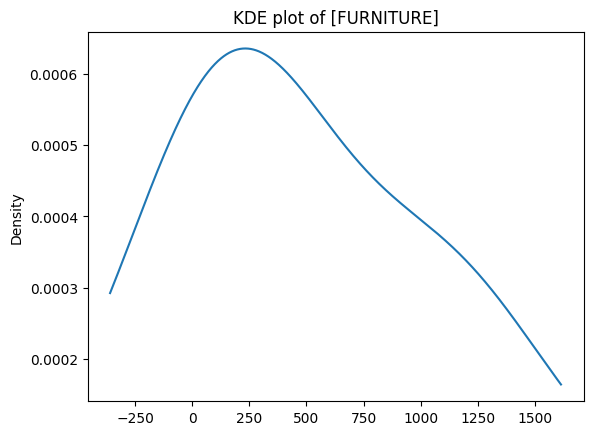

In [9]:

for feature in categorical_features:
    fig , axs=plt.subplots(1,1)
    axs=df[feature].value_counts().plot(kind='kde',title=f"KDE plot of [{feature.upper()}]",ylabel=f"{feature}")


# Insights
From the above plots it can be conclucded as furnishing and facing are normally distrubated and also has some misisng values of arounf 55% so we should apply the imputing process and maintain its distrubation .
and location has a suddent peak in tha middle so its should ne normalized after OHE.


# Numerical Features

In [10]:
df.describe()

,price,area,no_of_bedroom,no_of_bathroom,no_of_livingroom,no_of_kitchen,parking,road_size,no_of_flat
count,2.499000e+03,2488.000000,2691.000000,2691.000000,2691.000000,2691.000000,1427.000000,1441.000000,2689.000000
mean,3.181657e+07,1475.911184,5.611669,3.704942,1.616128,1.962653,1.577435,14.408744,2.779249
std,2.160833e+07,983.456418,2.734381,1.598294,0.826706,1.600940,1.140911,5.109580,0.821238
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.250000e+07,1069.530000,5.000000,3.000000,1.000000,1.000000,1.000000,12.000000,2.500000
50%,2.900000e+07,1283.430000,5.000000,4.000000,2.000000,2.000000,1.000000,13.000000,2.500000
75%,4.000000e+07,1652.417500,6.000000,4.000000,2.000000,2.000000,2.000000,16.000000,3.500000
max,4.050000e+08,24984.250000,32.000000,18.000000,7.000000,52.000000,10.000000,65.000000,8.000000


There are  values 0 which is absolutly outlier so we should remove those data.

In [11]:
[print(f'The number of missing value in {feature} is :{df[feature].isnull().sum()}') for feature in numerical_features]
print('-------------------------------------------------')
print(f'The total number of rows in in our dataset is :{len(df['price'])}')

The number of missing value in price is :192
The number of missing value in area is :203
The number of missing value in no_of_bedroom is :0
The number of missing value in no_of_bathroom is :0
The number of missing value in no_of_livingroom is :0
The number of missing value in no_of_kitchen is :0
The number of missing value in parking is :1264
The number of missing value in road_size is :1250
The number of missing value in no_of_flat is :2
-------------------------------------------------
The total number of rows in in our dataset is :2691


Insight
-
There are 192 ,203 missing values in price and area heading which are two importnat feature so we should remove those data , and for parking are road_size are, minmum parking is 1-2 bikes so we can adjust it accoringly where as for mini road_size is madatoryly 13feet wide so we can remove the outlier and replace null values with 13.and for flat we will drop the values.


In [12]:
[print(f'The proportion  of missing value in {feature} is :{df[feature].isnull().sum()/len(df['price'])*100}') for feature in numerical_features]
print('----------------------------------------------------------------------------') 

The proportion  of missing value in price is :7.1348940914158305
The proportion  of missing value in area is :7.5436640654031955
The proportion  of missing value in no_of_bedroom is :0.0
The proportion  of missing value in no_of_bathroom is :0.0
The proportion  of missing value in no_of_livingroom is :0.0
The proportion  of missing value in no_of_kitchen is :0.0
The proportion  of missing value in parking is :46.97138610182088
The proportion  of missing value in road_size is :46.45113340765515
The proportion  of missing value in no_of_flat is :0.07432181345224824
----------------------------------------------------------------------------


In [13]:
for feature in numerical_features:
  print(df[feature].value_counts()),
  print('---------------------------') 


price
29000000.0    131
32500000.0    126
40000000.0    117
15500000.0    116
50000000.0    106
             ... 
9500000.0       1
95500000.0      1
43000000.0      1
64000000.0      1
48500000.0      1
Name: count, Length: 139, dtype: int64
---------------------------
area
1026.75    317
1369.00    256
1711.25    203
1112.31    131
1197.87    122
          ... 
2802.17      1
3251.37      1
3508.06      1
3593.62      1
4620.37      1
Name: count, Length: 112, dtype: int64
---------------------------
no_of_bedroom
5.0     823
6.0     610
4.0     295
7.0     273
2.0     223
8.0     126
3.0      65
0.0      58
9.0      57
10.0     38
12.0     28
11.0     22
13.0     20
14.0     10
15.0      8
16.0      7
20.0      6
1.0       4
18.0      4
24.0      2
2.5       2
27.0      2
17.0      2
19.0      2
22.0      2
32.0      2
Name: count, dtype: int64
---------------------------
no_of_bathroom
4.0     1085
3.0      558
5.0      415
1.0      223
2.0      166
6.0       98
0.0       58
7.0   

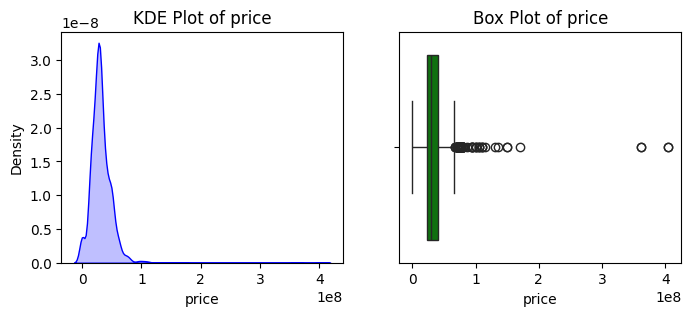

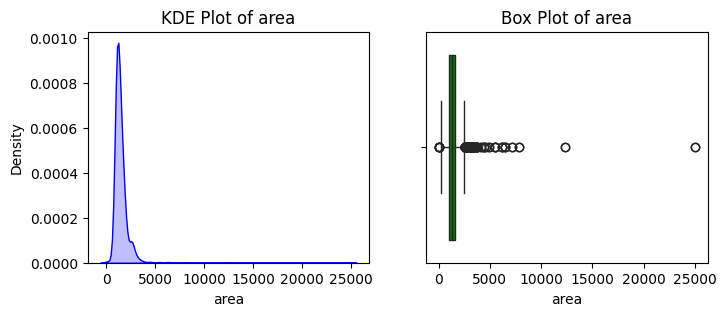

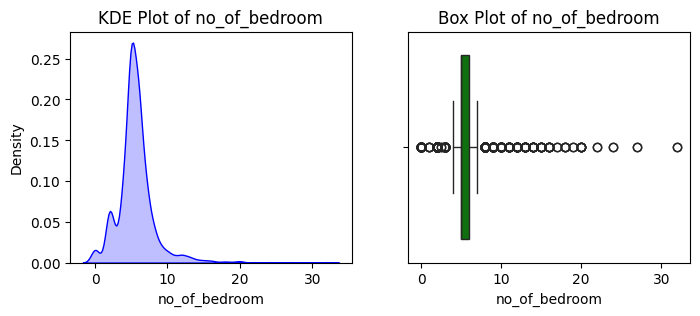

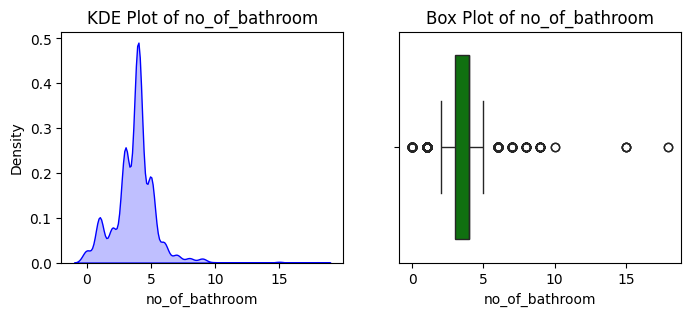

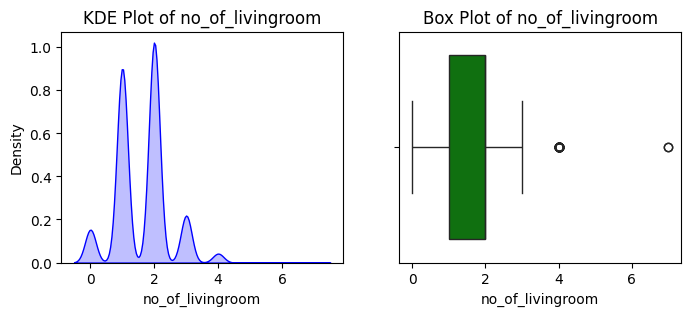

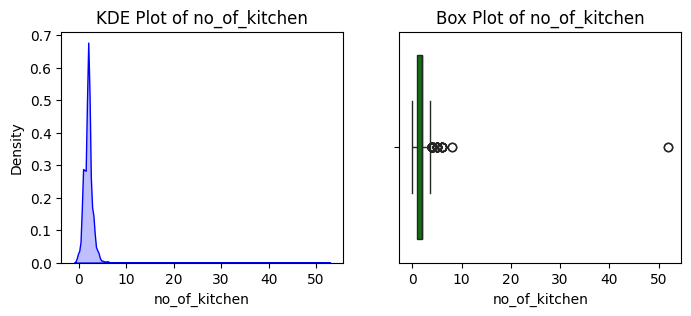

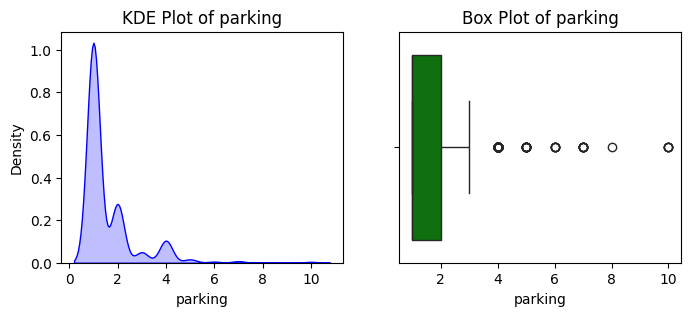

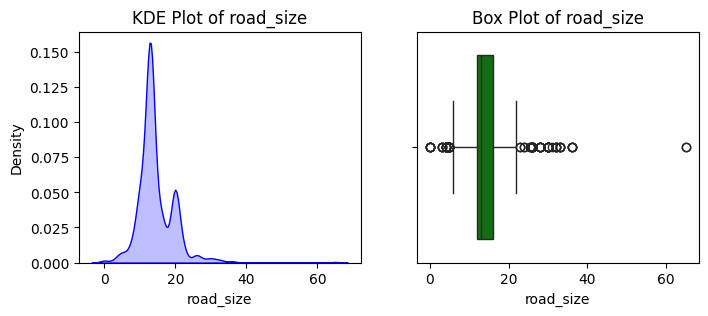

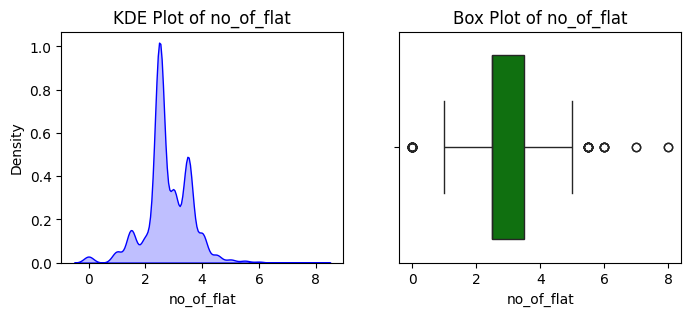

In [49]:
for feature in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    

    sns.kdeplot(data=df, x=feature, ax=ax[0], fill=True,color='blue')
    ax[0].set_title(f'KDE Plot of {feature}')

    sns.boxplot(data=df, x=feature, ax=ax[1],color='green')
    ax[1].set_title(f'Box Plot of {feature}')



The above KDE plot decip the uneven right screwed data .And multiple spikes on no_of_living room where.
Show the logx or smooth.
The Box plots shows us the data contains so much outlier on the higher side so its hould be removed or normalized for that normal data. for the fetures like :road_size,no_of_parking ,no_of_livingroom, no_of_kitchen we shold removed the data and normalized it 